# Task 1: Introduction

![Movies Collage](https://i.imgur.com/T7V0VZ6.png)

For this project creating a recommendation engine for movies for users based on there past behaviour is the goal.

---
Focus is on **collaborative filtering** approach, that is: 

The user is recommended items that people with similar tastes and preferences liked in the past. In another word, this method predicts unknown ratings by using the similarities between users.


#### 1.1: Importing/Installing Libraries

In [2]:
!pip3 install pandas matplotlib numpy scikit-surprise

     |████████████████████████████████| 11.8MB 3.8MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670910 sha256=28cf7f8ceb534b5e7c7aee7c251adb7aa0e6ca0eec5db60de89411480e624032
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [3]:
print('>> Importing Libraries')

import pandas as pd

from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

print('>> Libraries imported.')

>> Importing Libraries
>> Libraries imported.


### Task 2: Importing Data
#### 2.1: Importing the Data

In [6]:
df = pd.read_csv('ratings (1).csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931




#### 2.2 Dropping extra columns.

In [7]:
df.drop('timestamp', axis = 1, inplace = True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0




#### 2.3 Checking for Missing Data

In [8]:
df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

### Task 3: EDA (Exploratory data analysis)
#### 3.1 Number of movies/users

In [9]:
n_movies = df['movieId'].nunique()
n_users = df['userId'].nunique()

In [10]:
print('Number of Unique Movies are:', n_movies)

Number of Unique Movies are: 9724


In [11]:
print('Number of Unique Users are:', n_users)

Number of Unique Users are: 610




#### 3.2 Sparsity of our data

In [12]:
available_ratings = df['rating'].count()
total_ratings = n_movies*n_users
missing_ratings = total_ratings - available_ratings
missing_ratings

5830804

In [13]:
sparsity_ratings = round((missing_ratings/total_ratings)*100,3)
sparsity_ratings

98.3

#### 3.3 Rating Distribution

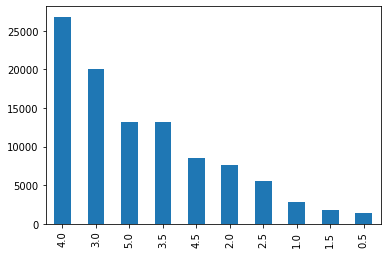

In [14]:
df['rating'].value_counts().plot(kind = 'bar')

In [15]:
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### Task 4: Dimensionality Reduction
#### 4.1 Filter movies with less than 3 ratings

In [16]:
filter_movies = df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()
#filter_movies



#### 4.2 Filter users with less than 3 movies rated

In [17]:
filter_users = df['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()



#### 4.3 Remove rarely rated movies and rarely rating users


In [18]:
print('Before removing rarely rated data:' ,df.shape)
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print('After removing rarely rated data:' ,df.shape)

Before removing rarely rated data: (100836, 3)
After removing rarely rated data: (92394, 3)



### Task 5: Create Training and Test Sets
#### 5.1 Selecting columns used for training

In [19]:
cols = ['userId', 'movieId', 'rating']
cols

['userId', 'movieId', 'rating']



#### 5.2 Create surprise dataset

In [20]:
reader = Reader(rating_scale = (0.5,5))
data = Dataset.load_from_df(df[cols],reader)

#### 5.3 Create Train-set and Prediction-set


In [23]:
train = data.build_full_trainset()
antiset = train.build_anti_testset()



### Task 6: Creating/training the model
#### 6.1 Creating the model

**SVD (Singular Value Decomposition)**

Interaction Matrix = A X B X C

In [24]:
svd = SVD(n_epochs= 25, verbose= True)


#### 6.2 Training the model

**Mean Absolute Error (MAE)**: MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. 

**Root mean squared error (RMSE)**:  RMSE is the square root of the average of squared differences between prediction and actual observation.

In [25]:
cross_validate(svd, data, verbose = True, measures = ['RMSE','MAE'], cv = 5)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

{'fit_time': (7.161555051803589,
  7.355576038360596,
  7.070690155029297,
  6.749825954437256,
  6.616758823394775),
 'test_mae': array([0.65919313, 0.66134675, 0.65979406, 0.65990829, 0.66243504]),
 'test_rmse': array([0.86147376, 0.86445565, 0.85907532, 0.85955843, 0.8631618 ]),
 'test_time': (0.3091747760772705,
  0.15480875968933105,
  0.1635112762451172,
  0.14966320991516113,
  0.14612126350402832)}

### Task 7: Predictions
#### 7.1 Predict ratings for all pairs (user, items) that are NOT in the training set.

In [26]:
predictions = svd.test(antiset)

In [27]:
predictions[1]

Prediction(uid=1, iid=1704, r_ui=3.529119856267723, est=4.809500795456324, details={'was_impossible': False})

#### 7.2 Recommending top 3 movies movies based on predictions

In [34]:
from collections import defaultdict
def get_top_n(predictions,n):
  top_n = defaultdict(list)
  for uid, iid, _, est, _ in predictions:
    top_n[uid].append((iid,est))
  for uid, user_ratings in top_n.items():
    user_ratings.sort(key = lambda x: x[1], reverse = True)
    top_n[uid] = user_ratings[:n]
  return top_n
  pass
top_n = get_top_n(predictions,n = 3)
for uid, user_ratings in top_n.items():
  print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 908, 1225]
2 [356, 898, 1041]
3 [750, 246, 2019]
4 [54503, 1178, 1148]
5 [1387, 1199, 1207]
6 [1242, 2318, 58559]
7 [858, 527, 1204]
8 [56782, 930, 104879]
9 [1204, 527, 142488]
10 [1207, 933, 1172]
11 [1196, 527, 1204]
12 [1, 50, 110]
13 [1233, 1204, 1208]
14 [1213, 2324, 904]
15 [1204, 2324, 265]
16 [1178, 1237, 57669]
17 [1237, 3275, 142488]
18 [912, 1204, 1104]
19 [858, 3030, 110]
20 [4973, 1136, 924]
21 [2324, 1204, 1172]
22 [1197, 1073, 47]
23 [1204, 5992, 56782]
24 [1204, 2959, 1225]
25 [1196, 1210, 1213]
26 [2959, 4993, 7153]
27 [318, 904, 1204]
28 [4848, 904, 1148]
29 [2324, 56782, 527]
30 [1136, 48516, 912]
31 [904, 318, 1204]
32 [1272, 741, 1237]
33 [750, 858, 7153]
34 [1270, 71535, 527]
35 [1206, 741, 1204]
36 [296, 1196, 2959]
37 [1136, 1204, 4973]
38 [1204, 44555, 56782]
39 [2959, 318, 3275]
40 [898, 1213, 2324]
41 [318, 527, 858]
42 [142488, 4995, 2078]
43 [50, 223, 260]
44 [527, 608, 1209]
45 [527, 914, 5952]
46 [2571, 2959, 1204]
47 [930, 48516, 1178]
48 [318, 